# Import libraries

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import dataset

In [31]:
dataset = pd.read_csv('master.csv')
X = dataset.drop(['suicides/100k pop', 'suicides_no', 'country-year'], axis=1) #delete some "duplicate" features
y = dataset['suicides/100k pop']

# Preprocessing

In [32]:
X[' gdp_for_year ($) '] = X[' gdp_for_year ($) '].str.replace(',', '').astype(float)

In [33]:
#X #is gdp for year relevant?

# Investigate correlation

##### Nothing seems to be linearly correlated so I'll leave all the independent variables in

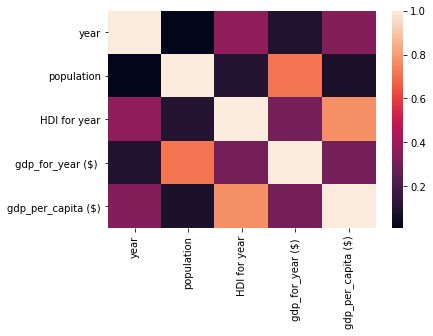

In [34]:
import seaborn as sns
corr = X.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

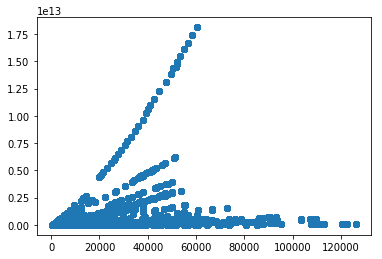

In [35]:
plt.scatter(X['gdp_per_capita ($)'], X[' gdp_for_year ($) '])
#I'll keep both these in. Some countries like the Soviet Union had a hight GDP per capita but did not distibute the wealth

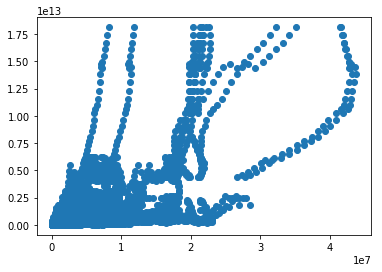

In [36]:
plt.scatter(X['population'], X[' gdp_for_year ($) '])

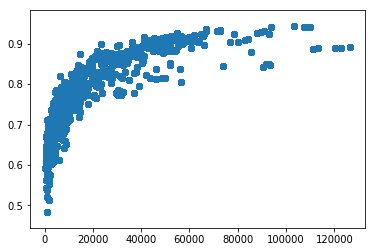

In [37]:
plt.scatter(X['gdp_per_capita ($)'], X['HDI for year'])

# Check for outliers

In [38]:
X.columns.values

array(['country', 'year', 'sex', 'age', 'population', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype=object)

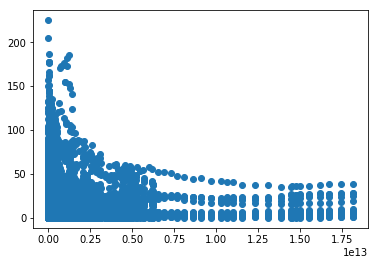

In [39]:
plt.scatter(X[' gdp_for_year ($) '], y) #seem to be outliers above suicide rates of 125 and over based on gdp and hdi. let's drop them

In [40]:
X = X[y < 125]
y = y[y < 125]

In [41]:
numeric_features = ['year','HDI for year', ' gdp_for_year ($) ', 'population',
                   'gdp_per_capita ($)']
categorical_features = ['country', 'sex', 'age', 'generation']

In [42]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer, OneHotEncoder, StandardScaler #these all appear to come because HDI wasn't available prior to 2

numeric_transformer = Pipeline(steps=[
    ('imputer', Imputer(missing_values='NaN', strategy='mean')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

clf = Pipeline(steps=[('preprocessor', preprocessor)])
X = clf.fit_transform(X)



C:\Users\Justin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Justin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Try linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept=False)
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

In [ ]:
y_pred_test = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

# Evaluate performance

In [ ]:
from sklearn.metrics import mean_squared_error
rms_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
rms_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

In [ ]:
print('The RMSE of the training set is: ' + rms_train.astype(str))
print('The RMSE of the test set is: ' + rms_test.astype(str))

The RMSE of the training set is: 12.219462857565233
The RMSE of the test set is: 12.0880461723024


# Save Results

In [ ]:
results = pd.DataFrame({'model': ['linear regression'],
                        'training RMSE': [rms_train],
                       'test RMSE': [rms_test]})

# Try backwards elimination

In [ ]:
X_train.shape
#X_train = np.append(np.ones((22256, 1)).astype(int), values=X_train, axis=1) #Add constants

(22212, 120)

In [ ]:
# import statsmodels.formula.api as sm
# def backwardElimination(x, sl):
#     numVars = len(x[0])
#     for i in range(0, numVars):
#         regressor_OLS = sm.OLS(y, x).fit()
#         maxVar = max(regressor_OLS.pvalues).astype(float)
#         if maxVar > sl:
#             for j in range(0, numVars - i):
#                 if (regressor_OLS.pvalues[j].astype(float) == maxVar):
#                     x = np.delete(x, j, 1)
#     regressor_OLS.summary()
#     return x
 
# SL = 0.05
# X_opt = X_train.todense()
# X_Modeled = backwardElimination(X_opt, SL)

In [ ]:
#X_Mod

# Try Support Vector Regression

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X_train, y_train)
y_pred_test = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)
from sklearn.metrics import mean_squared_error
rms_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
rms_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
print('The RMSE of the training set is: ' + rms_train.astype(str))
print('The RMSE of the test set is: ' + rms_test.astype(str))

C:\Users\Justin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Use either grid or random search to find optimal parameters

In [ ]:
results = results.append({'model': 'SVR rbf Kernel',
                           'training RMSE': rms_train,
                           'test RMSE': rms_test}, ignore_index=True)

# Try Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
y_pred_test = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)
rms_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
rms_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
print('The RMSE of the training set is: ' + rms_train.astype(str))
print('The RMSE of the test set is: ' + rms_test.astype(str))
results = results.append({'model': 'Decision Tree Regression',
                           'training RMSE': rms_train,
                           'test RMSE': rms_test}, ignore_index=True)
results